<a href="https://colab.research.google.com/github/UOH-Group3-Project/Hackathon_group3/blob/main/Group3%20updated1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
from google.colab import files

# This will open a file picker dialog
uploaded = files.upload()


Saving dataset_A_testing.csv to dataset_A_testing (1).csv


In [50]:
import warnings
warnings.filterwarnings("ignore") # For suppressing warnings

import pandas as pd  # For data handling
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For prettier graphs
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.ensemble import RandomForestRegressor  # For building a prediction model
from sklearn.metrics import mean_squared_error, mean_absolute_error  # For evaluating the model
from datetime import datetime  # For handling dates
from sklearn.preprocessing import StandardScaler  # For scaling data
import statsmodels.api as sm  # For statistical analysis

In [51]:
# Load the dataset
df = pd.read_csv('dataset_A_training.csv', sep=';', low_memory=False)


In [52]:
df.head()

,"respondent_id,flu_concern,flu_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,employment_sector,seasonal_vaccine"
0,"1,2.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,..."
1,"2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,..."
2,"3,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,..."
3,"4,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,,0.0,0.0..."
4,"5,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,..."


In [53]:
print('Total number of data points in the dataset:', len(df))

Total number of data points in the dataset: 4756


In [54]:
missing_values_count = df.isnull().sum()
total_missing = missing_values_count.sum()

print("Missing values per column:\n", missing_values_count)
print(f"\nTotal missing values in dataset: {total_missing}")

Missing values per column:
 respondent_id,flu_concern,flu_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,employment_sector,seasonal_vaccine    0
dtype: int64

Total missing values in dataset: 0


In [55]:
dx = df.copy()

**Reasoning**:
The file was uploaded using `files.upload()`, which places it in the current working directory, not `/content/`. I will try loading the file using just the filename again, as the initial load seemed successful in cell `MX9tGPIMYINA`. Then I will split the column names and display the head.



## Data cleaning

### Subtask:
Check for and handle any missing or inconsistent values in the dataset.


**Reasoning**:
Based on the previous execution history, the DataFrame `df` was loaded but its column names were incorrectly read as a single string. I need to reload the data and then correctly set the column names before checking for missing values.



In [56]:
df = pd.read_csv('dataset_A_training.csv', sep=',', low_memory=False)

missing_values_count = df.isnull().sum()
total_missing = missing_values_count.sum()

print("Missing values per column:\n", missing_values_count)
print(f"\nTotal missing values in dataset: {total_missing}")

Missing values per column:
 respondent_id                     0
flu_concern                      12
flu_knowledge                    23
behavioral_antiviral_meds        14
behavioral_avoidance             32
behavioral_face_mask              3
behavioral_wash_hands             8
behavioral_large_gatherings       9
behavioral_outside_home           9
behavioral_touch_face            19
doctor_recc_seasonal            321
chronic_med_condition           188
child_under_6_months            152
health_worker                   149
health_insurance               1925
opinion_seas_vacc_effective      94
opinion_seas_risk               102
opinion_seas_sick_from_vacc     101
age_group                         0
education                       270
race                              0
sex                               0
income_poverty                  790
marital_status                  265
rent_or_own                     381
employment_status               269
census_msa                        0


**Reasoning**:
The missing values have been identified. Now I need to handle them. Based on the counts, some columns like `health_insurance` and `employment_sector` have a large number of missing values. For columns with fewer missing values that are numerical or categorical, I will impute them with the mode. For columns with a high percentage of missing values, I will drop them to avoid introducing bias.



In [57]:
# Impute missing values with the mode for selected columns
columns_to_impute_mode = [
    'flu_concern', 'flu_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance',
    'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings',
    'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_seasonal',
    'chronic_med_condition', 'child_under_6_months', 'health_worker',
    'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc',
    'education', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status',
    'household_adults', 'household_children'
]

for col in columns_to_impute_mode:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])

# Drop columns with a high percentage of missing values
columns_to_drop = ['health_insurance', 'employment_sector']
df = df.drop(columns=columns_to_drop)

# Verify that missing values have been handled
missing_values_count_after = df.isnull().sum()
total_missing_after = missing_values_count_after.sum()

print("Missing values per column after handling:\n", missing_values_count_after)
print(f"\nTotal missing values in dataset after handling: {total_missing_after}")

Missing values per column after handling:
 respondent_id                  0
flu_concern                    0
flu_knowledge                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
census_msa                     0
household_adults               0
household_children             0
seasonal_vaccine               0


## Feature engineering

### Subtask:
Create new features or transform existing ones if necessary.


**Reasoning**:
Examine the data types and distributions of the existing columns to identify opportunities for feature engineering and then implement these transformations.



Data types before feature engineering:
 respondent_id                    int64
flu_concern                    float64
flu_knowledge                  float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty                  object
marital_status                  object
rent_or_own                     object
employment_status       

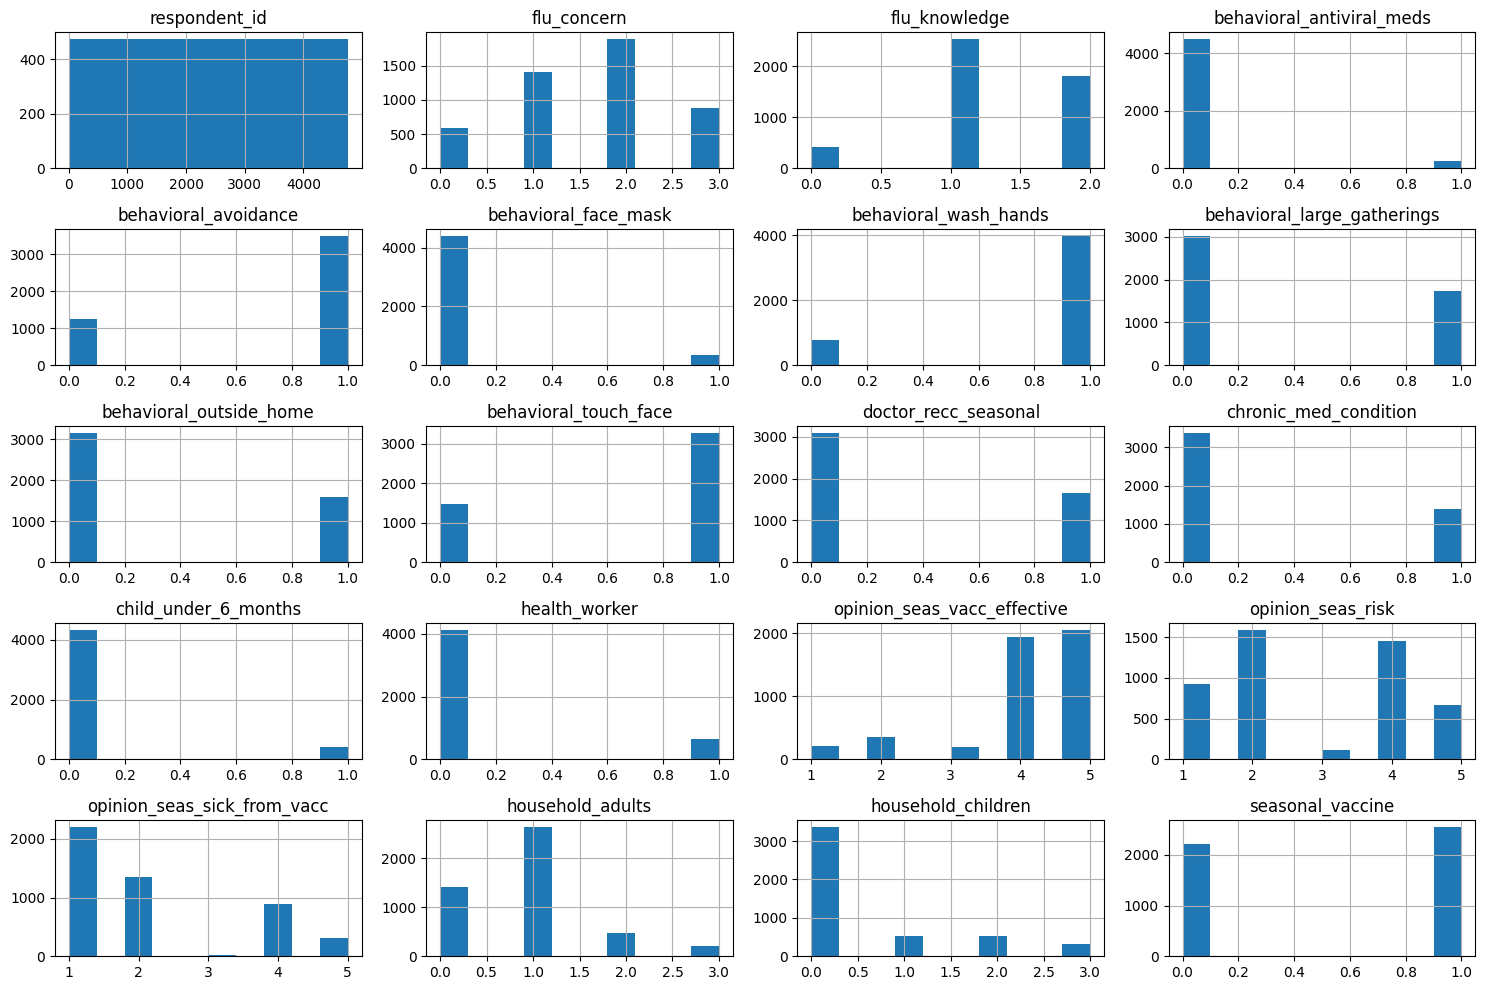

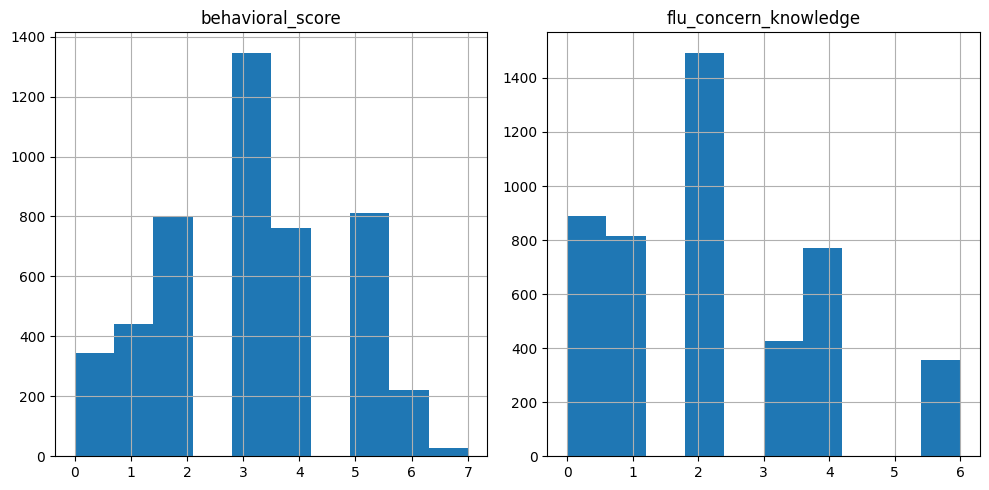

Data types after feature engineering:
 respondent_id                    int64
flu_concern                    float64
flu_knowledge                  float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty                  object
marital_status                  object
rent_or_own                     object
employment_status        

,respondent_id,flu_concern,flu_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,seasonal_vaccine,behavioral_score,flu_concern_knowledge
0,1,2.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,Non-MSA,0.0,0.0,0,3.0,0.0
1,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0,1.0,1.0
2,3,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,"> $75,000",Married,Own,Not in Labor Force,"MSA, Not Principle City",1.0,0.0,0,4.0,2.0
3,4,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,2.0,1,3.0,2.0
4,5,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Not Principle City",2.0,0.0,0,5.0,4.0


In [58]:
# Check data types of columns
print("Data types before feature engineering:\n", df.dtypes)

# Examine distributions of numerical features
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

# Create a new feature by combining behavioral indicators
behavioral_cols = [col for col in df.columns if 'behavioral' in col]
df['behavioral_score'] = df[behavioral_cols].sum(axis=1)

# Create age ranges if the 'age_group' column is suitable (appears categorical, so skip for now)
# If age_group was numerical, we could use pd.cut:
# df['age_range'] = pd.cut(df['age_group'], bins=[0, 18, 35, 60, np.inf], labels=['0-17', '18-34', '35-59', '60+'])

# Interaction term between flu concern and flu knowledge
df['flu_concern_knowledge'] = df['flu_concern'] * df['flu_knowledge']

# Examine distributions of new numerical features
df[['behavioral_score', 'flu_concern_knowledge']].hist(figsize=(10, 5))
plt.tight_layout()
plt.show()

print("Data types after feature engineering:\n", df.dtypes)
print("\nFirst 5 rows of the DataFrame with new features:")
display(df.head())

## Encode categorical variables

### Subtask:
Convert categorical features into numerical representations suitable for modeling.


**Reasoning**:
Identify categorical columns and apply one-hot encoding.



In [59]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns
print(f"Categorical columns identified: {list(categorical_cols)}")

# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, dummy_na=False)

# Print the first few rows and data types of the updated DataFrame
print("\nDataFrame after one-hot encoding:")
display(df.head())
print("\nData types after one-hot encoding:")
print(df.dtypes)

Categorical columns identified: ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'census_msa']

DataFrame after one-hot encoding:


,respondent_id,flu_concern,flu_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,marital_status_Married,marital_status_Not Married,rent_or_own_Own,rent_or_own_Rent,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA
0,1,2.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,False,True,False,True,True,False,False,False,False,True
1,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,True,True,False,False,False,True,False
2,3,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,True,False,True,False,False,True,False,True,False,False
3,4,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,True,False,True,False,True,False,False,True,False,False
4,5,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,False,True,False,True,False,True,False,True,False,False



Data types after one-hot encoding:
respondent_id                                 int64
flu_concern                                 float64
flu_knowledge                               float64
behavioral_antiviral_meds                   float64
behavioral_avoidance                        float64
behavioral_face_mask                        float64
behavioral_wash_hands                       float64
behavioral_large_gatherings                 float64
behavioral_outside_home                     float64
behavioral_touch_face                       float64
doctor_recc_seasonal                        float64
chronic_med_condition                       float64
child_under_6_months                        float64
health_worker                               float64
opinion_seas_vacc_effective                 float64
opinion_seas_risk                           float64
opinion_seas_sick_from_vacc                 float64
household_adults                            float64
household_children          

## Feature scaling

### Subtask:
Scale numerical features to ensure they have a similar range of values.


**Reasoning**:
Identify numerical columns, instantiate StandardScaler, fit and transform the data, replace original columns, and display the result.



In [60]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Exclude the target variable and the 'respondent_id' column
numerical_cols.remove('seasonal_vaccine')
numerical_cols.remove('respondent_id')

print(f"Numerical columns to scale: {numerical_cols}")

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit and transform the selected numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the first few rows and data types
print("\nDataFrame after scaling numerical features:")
display(df.head())
print("\nData types after scaling:")
print(df.dtypes)

Numerical columns to scale: ['flu_concern', 'flu_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults', 'household_children', 'behavioral_score', 'flu_concern_knowledge']

DataFrame after scaling numerical features:


,respondent_id,flu_concern,flu_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,marital_status_Married,marital_status_Not Married,rent_or_own_Own,rent_or_own_Rent,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA
0,1,0.387462,-2.091126,-0.234549,0.599047,-0.28228,0.44156,1.319549,-0.711348,-1.490712,...,False,True,False,True,True,False,False,False,False,True
1,2,-0.701002,-0.472146,-0.234549,0.599047,-0.28228,-2.26470,-0.757835,-0.711348,-1.490712,...,False,True,False,True,True,False,False,False,True,False
2,3,0.387462,-0.472146,-0.234549,0.599047,-0.28228,0.44156,1.319549,1.405781,-1.490712,...,True,False,True,False,False,True,False,True,False,False
3,4,-0.701002,1.146835,-0.234549,0.599047,-0.28228,0.44156,-0.757835,-0.711348,0.670820,...,True,False,True,False,True,False,False,True,False,False
4,5,0.387462,1.146835,-0.234549,0.599047,-0.28228,0.44156,1.319549,1.405781,0.670820,...,False,True,False,True,False,True,False,True,False,False



Data types after scaling:
respondent_id                                 int64
flu_concern                                 float64
flu_knowledge                               float64
behavioral_antiviral_meds                   float64
behavioral_avoidance                        float64
behavioral_face_mask                        float64
behavioral_wash_hands                       float64
behavioral_large_gatherings                 float64
behavioral_outside_home                     float64
behavioral_touch_face                       float64
doctor_recc_seasonal                        float64
chronic_med_condition                       float64
child_under_6_months                        float64
health_worker                               float64
opinion_seas_vacc_effective                 float64
opinion_seas_risk                           float64
opinion_seas_sick_from_vacc                 float64
household_adults                            float64
household_children                   

## Prepare data for modeling

### Subtask:
Separate the features (X) and target variable (y).


**Reasoning**:
Separate the features (X) and target variable (y) and print their shapes.



In [61]:
# Define the target variable y
y = df['seasonal_vaccine']

# Define the features X by dropping the target variable and 'respondent_id'
X = df.drop(['seasonal_vaccine', 'respondent_id'], axis=1)

# Print the shapes of X and y to verify the separation
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (4756, 48)
Shape of y: (4756,)


## Model Evaluation

### Subtask:
Evaluate the performance of the trained model using appropriate metrics.

**Reasoning**:
Predict on the test set and calculate evaluation metrics.

In [62]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

# Display the predicted values
print("\nPredicted values for seasonal_vaccine:")
display(y_pred)

Mean Squared Error (MSE): 0.22947431992741116
Mean Absolute Error (MAE): 0.4424712002040502

Predicted values for seasonal_vaccine:


array([0.6020915 , 0.14449644, 0.68154559, 0.86987959, 0.48393676,
       0.31902823, 0.68154559, 0.69055889, 0.83507941, 0.56554537,
       0.76931869, 0.56554537, 0.93840068, 0.76931869, 0.32435686,
       0.68154559, 0.48393676, 0.68154559, 0.47901395, 0.6676466 ,
       0.56554537, 0.76011201, 0.6020915 , 0.68154559, 0.31902823,
       0.6020915 , 0.47901395, 0.47901395, 0.68154559, 0.68744291,
       0.48393676, 0.1751962 , 0.31902823, 0.31902823, 0.75516084,
       0.2880352 , 0.47901395, 0.47901395, 0.62861022, 0.62861022,
       0.48393676, 0.31902823, 0.31902823, 0.31902823, 0.48393676,
       0.86987959, 0.6020915 , 0.75516084, 0.6020915 , 0.47901395,
       0.86987959, 0.68154559, 0.68744291, 0.68744291, 0.6020915 ,
       0.32435686, 0.47901395, 0.48393676, 0.76931869, 0.47901395,
       0.48393676, 0.68154559, 0.47901395, 0.31902823, 0.54911678,
       0.48393676, 0.54911678, 0.330121  , 0.330121  , 1.        ,
       0.48393676, 0.71083958, 0.47901395, 0.31902823, 0.17519

# Task
Evaluate classification metrics for seasonal_vaccine predictions.

## Convert predictions to binary

### Subtask:
Apply a threshold (e.g., 0.5) to the predicted values (`y_pred`) to classify them as 0 or 1.


**Reasoning**:
Apply a threshold of 0.5 to the predicted values to obtain binary class labels and display the result.



In [63]:
# Apply a threshold of 0.5 to y_pred to get binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Display the first few elements of the binary predictions
print("Binary predicted values for seasonal_vaccine:")
display(y_pred_binary[:10])

Binary predicted values for seasonal_vaccine:


array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1])

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Calculate classification metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred) # AUC requires the continuous predictions

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Display the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"ROC AUC Score: {roc_auc}")
print("\nConfusion Matrix:")
display(conf_matrix)

Accuracy: 0.6407563025210085
Precision: 0.6485943775100401
Recall: 0.6591836734693878
F1-score: 0.6538461538461539
ROC AUC Score: 0.6741319904585209

Confusion Matrix:


array([[287, 175],
       [167, 323]])